In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns




In [4]:

df = pd.read_csv('predictive-linear-regression/data/balance.csv')
df2 = pd.read_csv('predictive-linear-regression/data/balance.csv')

In [5]:
df = df.drop(['Unnamed: 0'],axis=1)

In [6]:
# sns.pairplot(df);

In [7]:
df.Gender.replace({'Female': 1, ' Male': 0}, inplace=True)
df.Student.replace({'Yes': 1, 'No': 0}, inplace=True)
df.Married.replace({'Yes': 1, 'No': 0}, inplace=True)

In [8]:
df2 = pd.concat([df, pd.get_dummies(df['Ethnicity'], prefix='Ethi')], axis=1)

df2 = df2.drop(['Ethnicity', 'Ethi_African American'], axis=1)

In [10]:
multi_x = df2.drop(['Balance'],axis=1)
multi_x = sm.add_constant(multi_x)
y = df2.Balance

y.shape, multi_x.shape

((400,), (400, 12))

In [117]:
reg = sm.OLS(y, multi_x)
reg = reg.fit()
reg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     750.3
Date:                Tue, 28 Jul 2020   Prob (F-statistic):          1.11e-253
Time:                        17:10:39   Log-Likelihood:                -2398.7
No. Observations:                 400   AIC:                             4821.
Df Residuals:                     388   BIC:                             4869.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -479.2079     35.774    -13.395      0.000    -549.543    -408.873
Income            -7.8031      0.234    -33.314      0.000      -8.264      -7.343
Limit              0.1909      0.033      5.824      0.000       0.126       0.255
Rating             1.1365      0.491      2.315      0.021       0.171       2.102
Cards             17.7245      4.341      4.083      0.000       9.190      26.259
Age               -0.6139      0.294     -2.088      0.037      -1.192      -0.036
Education         -1.0989      1.598     -0.688      0.492      -4.241       2.043
Gender           -10.6532      9.914     -1.075      0.283     -30.145       8.839
Student          425.7474     16.723     25.459      0.000     392.869     458.626
Married           -8.5339     10.363     -0.824      0.411     -28.908      11.841
Ethi_Asian        16.8042     14.119      1.190      0.235     -10.955      44.564
Ethi_Caucasian    10.1070     12.210      0.828      0.408     -13.899      34.113
==============================================================================
Omnibus:                       34.899   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.766
Skew:                           0.782   Prob(JB):                     8.52e-10
Kurtosis:                       3.241   Cond. No.                     3.87e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [118]:
df['y_hat'] = reg.predict(multi_x)

In [119]:
multi_x

,const,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethi_Asian,Ethi_Caucasian
0,1.0,14.891,3606,283,2,34,11,0,0,1,0,1
1,1.0,106.025,6645,483,3,82,15,1,1,1,1,0
2,1.0,104.593,7075,514,4,71,11,0,0,0,1,0
3,1.0,148.924,9504,681,3,36,11,1,0,0,1,0
4,1.0,55.882,4897,357,2,68,16,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
395,1.0,12.096,4100,307,3,32,13,0,0,1,0,1
396,1.0,13.364,3838,296,5,65,17,0,0,0,0,0
397,1.0,57.872,4171,321,5,67,12,1,0,1,0,1
398,1.0,37.728,2525,192,1,44,13,0,0,1,0,1


In [120]:
df["Residuals"] = df['Balance'] - df["y_hat"]

(-400.0, 2100.0)

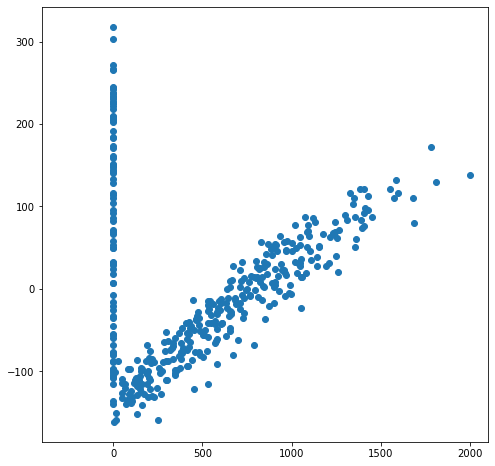

In [121]:
plt.figure(figsize=(8,8))
plt.scatter(df['Balance'],df['Residuals'])
plt.xlim(-400,2100)

In [106]:
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,y_hat
0,14.891,3606,283,2,34,11,0,0,1,Caucasian,333,418.704625
1,106.025,6645,483,3,82,15,1,1,1,Asian,903,920.700330
2,104.593,7075,514,4,71,11,0,0,0,Asian,580,671.509282
3,148.924,9504,681,3,36,11,1,0,0,Asian,964,972.211448
4,55.882,4897,357,2,68,16,0,0,1,Caucasian,331,403.044063


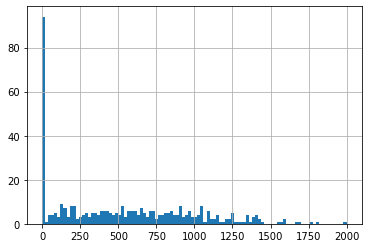

In [70]:

df.Balance.hist(bins=100)

In [77]:
# for name in df.columns:
#     df.plot(kind='scatter', y='Balance', x=name, edgecolor='none', figsize=(12,8))


In [75]:

df.columns
# df.plot(kind='scatter', y='Balance', x='Rating', edgecolor='none', figsize=(24, 24))

Index(['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender',
       'Student', 'Married', 'Ethnicity', 'Balance', 'y_hat', 'Residuals'],
      dtype='object')

In [97]:
df3 = df2[df2['Balance'] > 0]
df3

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Balance,Ethi_Asian,Ethi_Caucasian
0,14.891,3606,283,2,34,11,0,0,1,333,0,1
1,106.025,6645,483,3,82,15,1,1,1,903,1,0
2,104.593,7075,514,4,71,11,0,0,0,580,1,0
3,148.924,9504,681,3,36,11,1,0,0,964,1,0
4,55.882,4897,357,2,68,16,0,0,1,331,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
394,49.794,5758,410,4,40,8,0,0,0,734,0,1
395,12.096,4100,307,3,32,13,0,0,1,560,0,1
396,13.364,3838,296,5,65,17,0,0,0,480,0,0
397,57.872,4171,321,5,67,12,1,0,1,138,0,1


In [98]:
multi_x2 = df3.drop(['Balance'],axis=1)
multi_x2 = sm.add_constant(multi_x2)
y2 = df3.Balance
multi_x2

,const,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethi_Asian,Ethi_Caucasian
0,1.0,14.891,3606,283,2,34,11,0,0,1,0,1
1,1.0,106.025,6645,483,3,82,15,1,1,1,1,0
2,1.0,104.593,7075,514,4,71,11,0,0,0,1,0
3,1.0,148.924,9504,681,3,36,11,1,0,0,1,0
4,1.0,55.882,4897,357,2,68,16,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
394,1.0,49.794,5758,410,4,40,8,0,0,0,0,1
395,1.0,12.096,4100,307,3,32,13,0,0,1,0,1
396,1.0,13.364,3838,296,5,65,17,0,0,0,0,0
397,1.0,57.872,4171,321,5,67,12,1,0,1,0,1


In [101]:

reg2 = sm.OLS(y2, multi_x2)
reg2 = reg2.fit()
reg2.summary()

df3['y_hat'] = reg2.predict(multi_x2)

df3["Residuals"] = df3['Balance'] - df3["y_hat"]

In [102]:
df3

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Balance,Ethi_Asian,Ethi_Caucasian,y_hat,Residuals
0,14.891,3606,283,2,34,11,0,0,1,333,0,1,340.153870,-7.153870
1,106.025,6645,483,3,82,15,1,1,1,903,1,0,899.208092,3.791908
2,104.593,7075,514,4,71,11,0,0,0,580,1,0,591.110750,-11.110750
3,148.924,9504,681,3,36,11,1,0,0,964,1,0,950.345826,13.654174
4,55.882,4897,357,2,68,16,0,0,1,331,0,1,319.673593,11.326407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,49.794,5758,410,4,40,8,0,0,0,734,0,1,743.401039,-9.401039
395,12.096,4100,307,3,32,13,0,0,1,560,0,1,558.112326,1.887674
396,13.364,3838,296,5,65,17,0,0,0,480,0,0,478.933220,1.066780
397,57.872,4171,321,5,67,12,1,0,1,138,0,1,138.679770,-0.679770


OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.366e+04
Date:                Tue, 28 Jul 2020   Prob (F-statistic):               0.00
Time:                        17:01:44   Log-Likelihood:                -1162.5
No. Observations:                 310   AIC:                             2349.
Df Residuals:                     298   BIC:                             2394.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -696.9077      4.412   -157.956      0.000    -705.590  

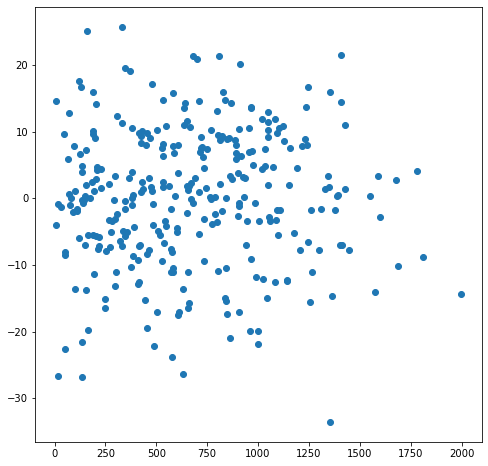

In [104]:
print(reg2.summary())
plt.figure(figsize=(8,8))
plt.scatter(df3['Balance'],df3['Residuals'])